Installing required libraries

In [ ]:
!pip install spacy

!python -m spacy download de_core_news_sm

2023-08-18 10:35:36.381310: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 10:35:37.891927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-18 10:35:40.002325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-18 10:35:40.002818: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Importing libraries

In [ ]:
import gensim
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from gensim.models.phrases import Phrases
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mounting google drive to read the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the dataset from google drive

In [ ]:


# Provide the path to Excel file
excel_file_path = '/content/drive/MyDrive/Interviews_Dataset - DBSCAN.xlsx'

# Read all sheets of the Excel file into a dictionary of dataframes
dfs = pd.read_excel(excel_file_path, sheet_name=None)

# Iterate over the sheets and drop the specified columns
for sheet_name, df in dfs.items():
    dfs[sheet_name] = df.drop(['Timecode', 'Sprecher'], axis=1)

# Print the modified dataframes
for sheet_name, df in dfs.items():
    print(f"Sheet: {sheet_name}")
    print(df)
    print("---------------------------")

Sheet: Sheet1
                                            Transkript
0                                 Können wir anfangen?
1    Also wäre schön, wenn Sie mit Kindheit beginne...
2    Ich bin gebürtig aus Hemer im Sauerland und bi...
3    Ich war das erste Enkelkind, einzige Enkelkind...
4    Und, ja, Kindheit verlief eigentlich an und fü...
..                                                 ...
716                        Man hat viel Elend gesehen.
717  Man hat gedacht, nö, guck mal, so kann’s ..., ...
718  Vor allen Dingen wenn man so wie ich groß gewo...
719  Ich mein, ich bin zwar immer schon so veranlag...
720                                    <***>[Bandende]

[721 rows x 1 columns]
---------------------------
Sheet: Sheet2
                                            Transkript
0                                  Johanna Alexander [
1    Ähm, also ich, äh, erblickte das sogenannte Li...
2    Meine Eltern, [kurze Pause] [Klirren] davon wa...
3                               Anne-Kat

Creating a function 'preprocess_text' that performs several text preprocessing steps on a the dataframe "df" containing text data.

In [ ]:
def preprocess_text(df):
    # Make everything lowercase
    df = df.apply(lambda x: x.astype(str).str.lower())

    # Remove punctuations and symbols
    df = df.apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ''))

    # Remove stopwords
    stop_words = set(stopwords.words('german'))
    additional_stopwords = ['ja', 'hmm', 'hm', 'ich', 'nein','ne','also','ähm','äh','richtig','ab','aber','abermaliges','abermals','abgerufen','abgerufene','abgerufener','abgerufenes','ab',
'aber',
'nich',
'se',
'dat',
'ham',
'kommen',
'eh',
'er',
'jahr',
'halt',
'los',
'raus',
'fruh',
'schon',
'abermaliges',
'abermals',
'abgerufen',
'abgerufene',
'abgerufener',
'abgerufenes',
'abgesehen',
'acht',
'aehnlich',
'aehnliche',
'aehnlichem',
'aehnlichen',
'aehnlicher',
'aehnliches',
'aehnlichste',
'aehnlichstem',
'aehnlichsten',
'aehnlichster',
'aehnlichstes',
'aeusserst',
'aeusserste',
'aeusserstem',
'aeussersten',
'aeusserster',
'aeusserstes',
'ähnlich',
'ähnliche',
'ähnlichem',
'ähnlichen',
'ähnlicher',
'ähnliches',
'ähnlichst',
'ähnlichste',
'ähnlichstem',
'ähnlichsten',
'aber',
'nich',
'se',
'dat',
'ham',
'kommen',
'eh',
'er',
'halt',
'los',
'raus',
'fruh',
'schon',
'abermaliges',
'abermals',
'abgerufen',
'abgerufene',
'abgerufener',
'abgerufenes',
'abgesehen',
'acht',
'aehnlich',
'aehnliche',
'aehnlichem',
'aehnlichen',
'aehnlicher',
'aehnliches',
'aehnlichste',
'aehnlichstem',
'aehnlichsten',
'aehnlichster',
'aehnlichstes',
'aeusserst',
'aeusserste',
'aeusserstem',
'aeussersten',
'aeusserster',
'aeusserstes',
'ähnlich',
'ähnliche',
'ähnlichem',
'ähnlichen',
'ähnlicher',
'ähnliches',
'ähnlichst',
'ähnlichste',
'ähnlichstem',
'ähnlichsten',
'ähnlichster',
'ähnlichstes',
'alle',
'allein',
'alleine',
'allem',
'allemal',
'allen',
'allenfalls',
'allenthalben',
'aller',
'allerdings',
'allerlei',
'alles',
'allesamt',
'allg',
'allg.',
'aa',
'aaa',
'aaaaah',
'aaaahh',
'aaah',
'aach ',
'allgemein',
'allgemeine',
'allgemeinem',
'allgemeinen',
'allgemeiner',
'allgemeines',
'allgemeinste',
'allgemeinstem',
'allgemeinsten',
'allgemeinster',
'allgemeinstes',
'allmählich',
'allzeit',
'allzu',
'als',
'alsbald',
'also',
'am',
'an',
'and',
'andauernd',
'andauernde',
'andauerndem',
'andauernden',
'andauernder',
'andauerndes',
'ander',
'andere',
'anderem',
'anderen',
'anderenfalls',
'anderer',
'andererseits',
'anderes',
'anderm',
'andern',
'andernfalls',
'anderr',
'anders',
'anderst',
'anderweitig',
'anderweitige',
'anderweitigem',
'anderweitigen',
'anderweitiger',
'anderweitiges',
'anerkannt',
'anerkannte',
'anerkannter',
'anerkanntes',
'anfangen',
'anfing',
'angefangen',
'angesetze',
'angesetzt',
'angesetzten',
'angesetzter',
'ans',
'anscheinend',
'ansetzen',
'ansonst',
'ansonsten',
'anstatt',
'anstelle',
'arbeiten',
'auch',
'auf',
'aufgehört',
'aufgrund',
'aufhören',
'aufhörte',
'aufzusuchen',
'augenscheinlich',
'augenscheinliche',
'augenscheinlichem',
'augenscheinlichen',
'augenscheinlicher',
'augenscheinliches',
'augenscheinlichst',
'augenscheinlichste',
'augenscheinlichstem',
'augenscheinlichsten',
'augenscheinlichster',
'augenscheinlichstes',
'aus',
'ausdrücken',
'ausdrücklich',
'ausdrückliche',
'ausdrücklichem',
'ausdrücklichen',
'ausdrücklicher',
'ausdrückliches',
'ausdrückt',
'ausdrückte',
'ausgenommen',
'ausgenommene',
'ausgenommenem',
'ausgenommenen',
'ausgenommener',
'ausgenommenes',
'ausgerechnet',
'ausgerechnete',
'ausgerechnetem',
'ausgerechneten',
'ausgerechneter',
'ausgerechnetes',
'ausnahmslos',
'ausnahmslose',
'ausnahmslosem',
'ausnahmslosen',
'ausnahmsloser',
'ausnahmsloses',
'außen',
'ausser',
'ausserdem',
'außerhalb',
'äusserst',
'äusserste',
'äusserstem',
'äussersten',
'äusserster',
'äusserstes',
'author',
'autor',
'baelde',
'bald',
'bälde',
'bearbeite',
'bearbeiten',
'bearbeitete',
'bearbeiteten',
'bedarf',
'bedürfen',
'bedurfte',
'been',
'befahl',
'befiehlt',
'befiehlte',
'befohlene',
'befohlens',
'befragen',
'befragte',
'befragten',
'befragter',
'begann',
'beginnen',
'begonnen',
'behalten',
'behielt',
'bei',
'beide',
'beidem',
'beiden',
'beider',
'beiderlei',
'beides',
'beim',
'beinahe',
'beisammen',
'beispielsweise',
'beitragen',
'beitrugen',
'bekannt',
'bekannte',
'bekannter',
'bekanntlich',
'bekanntliche',
'bekanntlichem',
'bekanntlichen',
'bekanntlicher',
'bekanntliches',
'bekennen',
'benutzt',
'bereits',
'berichten',
'berichtet',
'berichtete',
'berichteten',
'besonders',
'besser',
'bessere',
'besserem',
'besseren',
'besserer',
'besseres',
'bestehen',
'besteht',
'bestenfalls',
'bestimmt',
'bestimmte',
'bestimmtem',
'bestimmten',
'bestimmter',
'bestimmtes',
'beträchtlich',
'beträchtliche',
'beträchtlichem',
'beträchtlichen',
'beträchtlicher',
'beträchtliches',
'betraechtlich',
'betraechtliche',
'betraechtlichem',
'betraechtlichen',
'betraechtlicher',
'betraechtliches',
'betreffend',
'betreffende',
'betreffendem',
'betreffenden',
'betreffender',
'betreffendes',
'bevor',
'bez',
'bez.',
'bezgl',
'bezgl.',
'bezueglich',
'bezüglich',
'bietet',
'bin',
'bis',
'bisher',
'bisherige',
'bisherigem',
'bisherigen',
'bisheriger',
'bisheriges',
'bislang',
'bisschen',
'bist',
'bitte',
'bleiben',
'bleibt',
'blieb',
'bloss',
'böden',
'boeden',
'brachte',
'brachten',
'brauchen',
'braucht',
'bräuchte',
'bringen',
'bsp',
'bsp.',
'bspw',
'bspw.',
'bzw',
'bzw.',
'ca',
'ca.',
'circa',
'da',
'dabei',
'dadurch',
'dafuer',
'dafür',
'dagegen',
'daher',
'dahin',
'dahingehend',
'dahingehende',
'dahingehendem',
'dahingehenden',
'dahingehender',
'dahingehendes',
'dahinter',
'damalige',
'damaligem',
'damaligen',
'damaliger',
'damaliges',
'damals',
'damit',
'danach',
'daneben',
'dank',
'danke',
'danken',
'dann',
'dannen',
'daran',
'darauf',
'daraus',
'darf',
'darfst',
'darin',
'darüber',
'darüberhinaus',
'darueber',
'darueberhinaus',
'darum',
'darunter',
'das',
'daß',
'dass',
'dasselbe',
'Dat',
'davon',
'davor',
'dazu',
'dazwischen',
'dein',
'deine',
'deinem',
'deinen',
'deiner',
'deines',
'dem',
'demgegenüber',
'demgegenueber',
'demgemaess',
'demgemäss',
'demnach',
'demselben',
'den',
'denen',
'denkbar',
'denkbare',
'denkbarem',
'denkbaren',
'denkbarer',
'denkbares',
'denn',
'dennoch',
'denselben',
'der',
'derart',
'derartig',
'derartige',
'derartigem',
'derartigen',
'derartiger',
'derem',
'deren',
'derer',
'derjenige',
'derjenigen',
'derselbe',
'derselben',
'derzeit',
'derzeitig',
'derzeitige',
'derzeitigem',
'derzeitigen',
'derzeitiges',
'des',
'deshalb',
'desselben',
'dessen',
'dessenungeachtet',
'desto',
'desungeachtet',
'deswegen',
'dich',
'die',
'diejenige',
'diejenigen',
'dies',
'diese',
'dieselbe',
'dieselben',
'diesem',
'diesen',
'dieser',
'dieses',
'diesseitig',
'diesseitige',
'diesseitigem',
'diesseitigen',
'diesseitiger',
'diesseitiges',
'diesseits',
'dinge',
'dir',
'direkt',
'direkte',
'direkten',
'direkter',
'doch',
'doppelt',
'dort',
'dorther',
'dorthin',
'dran',
'drauf',
'drei',
'dreißig',
'drin',
'dritte',
'drüber',
'drueber',
'drum',
'drunter',
'du',
'duerfte',
'duerften',
'duerftest',
'duerftet',
'dunklen',
'durch',
'durchaus',
'durchweg',
'durchwegs',
'dürfen',
'durfte',
'dürfte',
'durften',
'dürften',
'durftest',
'dürftest',
'durftet',
'dürftet',
'eben',
'ebenfalls',
'ebenso',
'ect',
'ect.',
'ehe',
'eher',
'eheste',
'ehestem',
'ehesten',
'ehester',
'ehestes',
'eigen',
'eigene',
'eigenem',
'eigenen',
'eigener',
'eigenes',
'eigenst',
'eigentlich',
'eigentliche',
'eigentlichem',
'eigentlichen',
'eigentlicher',
'eigentliches',
'ein',
'einbaün',
'eine',
'einem',
'einen',
'einer',
'einerlei',
'einerseits',
'eines',
'einfach',
'einführen',
'einführte',
'einführten',
'eingesetzt',
'einig',
'einige',
'einigem',
'einigen',
'einiger',
'einigermaßen',
'einiges',
'einmal',
'einmalig',
'einmalige',
'einmaligem',
'einmaligen',
'einmaliger',
'einmaliges',
'eins',
'einseitig',
'einseitige',
'einseitigen',
'einseitiger',
'einst',
'einstmals',
'einzig',
'empfunden',
'ende',
'entgegen',
'entlang',
'entsprechend',
'entsprechende',
'entsprechendem',
'entsprechenden',
'entsprechender',
'entsprechendes',
'entweder',
'er',
'ergänze',
'ergänzen',
'ergänzte',
'ergänzten',
'ergo',
'erhält',
'erhalten',
'erhielt',
'erhielten',
'erneut',
'eröffne',
'eröffnen',
'eröffnet',
'eröffnete',
'eröffnetes',
'erscheinen',
'erst',
'erste',
'erstem',
'ersten',
'erster',
'erstere',
'ersterem',
'ersteren',
'ersterer',
'ersteres',
'erstes',
'es',
'etc',
'etc.',
'etliche',
'etlichem',
'etlichen',
'etlicher',
'etliches',
'etwa',
'etwaige',
'etwas',
'euch',
'euer',
'eure',
'eurem',
'euren',
'eurer',
'eures',
'euretwegen',
'fall',
'falls',
'fand',
'fast',
'ferner',
'fertig',
'finde',
'finden',
'findest',
'findet',
'folgend',
'folgende',
'folgendem',
'folgenden',
'folgender',
'folgendermassen',
'folgendes',
'folglich',
'for',
'fordern',
'fordert',
'forderte',
'forderten',
'fort',
'fortsetzen',
'fortsetzt',
'fortsetzte',
'fortsetzten',
'fragte',
'frau',
'frei',
'freie',
'freier',
'freies',
'fuer',
'fuers',
'fünf',
'für',
'fürs',
'gab',
'gaenzlich',
'gaenzliche',
'gaenzlichem',
'gaenzlichen',
'gaenzlicher',
'gaenzliches',
'gängig',
'gängige',
'gängigen',
'gängiger',
'gängiges',
'ganz',
'ganze',
'ganzem',
'ganzen',
'ganzer',
'ganzes',
'gänzlich',
'gänzliche',
'gänzlichem',
'gänzlichen',
'gänzlicher',
'gänzliches',
'gar',
'gbr',
'geb',
'geben',
'geblieben',
'gebracht',
'gedurft',
'geehrt',
'geehrte',
'geehrten',
'geehrter',
'gefallen',
'gefälligst',
'gefällt',
'gefiel',
'gegeben',
'gegen',
'gegenüber',
'gegenueber',
'gehabt',
'gehalten',
'gehen',
'geht',
'gekommen',
'gekonnt',
'gemacht',
'gemaess',
'gemäss',
'gemeinhin',
'gemocht',
'genau',
'genommen',
'genug',
'gepriesener',
'gepriesenes',
'gerade',
'gern',
'gesagt',
'gesehen',
'gestern',
'gestrige',
'getan',
'geteilt',
'geteilte',
'getragen',
'getrennt',
'gewesen',
'gewiss',
'gewisse',
'gewissem',
'gewissen',
'gewisser',
'gewissermaßen',
'gewisses',
'gewollt',
'geworden',
'ggf',
'ggf.',
'gib',
'gibt',
'gilt',
'gleich',
'gleiche',
'gleichem',
'gleichen',
'gleicher',
'gleiches',
'gleichsam',
'gleichste',
'gleichstem',
'gleichsten',
'gleichster',
'gleichstes',
'gleichwohl',
'gleichzeitig',
'gleichzeitige',
'gleichzeitigem',
'gleichzeitigen',
'gleichzeitiger',
'gleichzeitiges',
'glücklicherweise',
'gluecklicherweise',
'gmbh',
'gottseidank',
'gratulieren',
'gratuliert',
'gratulierte',
'groesstenteils',
'grösstenteils',
'gruendlich',
'gründlich',
'gut',
'gute',
'guten',
'hab',
'habe',
'haben',
'habt',
'haette',
'haeufig',
'haeufige',
'haeufigem',
'haeufigen',
'haeufiger',
'haeufigere',
'haeufigeren',
'haeufigerer',
'haeufigeres',
'halb',
'hallo',
'halten',
'hast',
'hat',
'hätt',
'hatte',
'hätte',
'hatten',
'hätten',
'hattest',
'hattet',
'häufig',
'häufige',
'häufigem',
'häufigen',
'häufiger',
'häufigere',
'häufigeren',
'häufigerer',
'häufigeres',
'hen',
'her',
'heraus',
'herein',
'herum',
'heute',
'heutige',
'heutigem',
'heutigen',
'heutiger',
'heutiges',
'hier',
'hierbei',
'hiermit',
'hiesige',
'hiesigem',
'hiesigen',
'hiesiger',
'hiesiges',
'hin',
'hindurch',
'hinein',
'hingegen',
'hinlanglich',
'hinlänglich',
'hinten',
'hintendran',
'hinter',
'hinterher',
'hinterm',
'hintern',
'hinunter',
'hoch',
'höchst',
'höchstens',
'http',
'hundert',
'ich',
'igitt',
'ihm',
'ihn',
'ihnen',
'ihr',
'ihre',
'ihrem',
'ihren',
'ihrer',
'ihres',
'ihretwegen',
'ihrige',
'ihrigen',
'ihriges',
'im',
'immer',
'immerhin',
'immerwaehrend',
'immerwaehrende',
'immerwaehrendem',
'immerwaehrenden',
'immerwaehrender',
'immerwaehrendes',
'immerwährend',
'immerwährende',
'immerwährendem',
'immerwährenden',
'immerwährender',
'immerwährendes',
'immerzu',
'important',
'in',
'indem',
'indessen',
'Inf.',
'info',
'infolge',
'infolgedessen',
'information',
'innen',
'innerhalb',
'innerlich',
'ins',
'insbesondere',
'insgeheim',
'insgeheime',
'insgeheimer',
'insgesamt',
'insgesamte',
'insgesamter',
'insofern',
'inzwischen',
'irgend',
'irgendein',
'irgendeine',
'irgendeinem',
'irgendeiner',
'irgendeines',
'irgendetwas',
'irgendjemand',
'irgendjemandem',
'irgendwann',
'irgendwas',
'irgendwelche',
'irgendwen',
'irgendwenn',
'irgendwer',
'irgendwie',
'irgendwo',
'irgendwohin',
'ist',
'ja',
'jaehrig',
'jaehrige',
'jaehrigem',
'jaehrigen',
'jaehriger',
'jaehriges',
'jährig',
'jährige',
'jährigem',
'jährigen',
'jähriges',
'je',
'jede',
'jedem',
'jeden',
'jedenfalls',
'jeder',
'jederlei',
'jedes',
'jedesmal',
'jedoch',
'jeglichem',
'jeglichen',
'jeglicher',
'jegliches',
'jemals',
'jemand',
'jemandem',
'jemanden',
'jemandes',
'jene',
'jenem',
'jenen',
'jener',
'jenes',
'jenseitig',
'jenseitigem',
'jenseitiger',
'jenseits',
'jetzt',
'jung',
'junge',
'jungem',
'jungen',
'junger',
'junges',
'kaeumlich',
'kam',
'kann',
'kannst',
'kaum',
'käumlich',
'kein',
'keine',
'keinem',
'keinen',
'keiner',
'keinerlei',
'keines',
'keineswegs',
'klar',
'klare',
'klaren',
'klares',
'klein',
'kleinen',
'kleiner',
'kleines',
'koennen',
'koennt',
'koennte',
'koennten',
'koenntest',
'koenntet',
'komme',
'kommen',
'kommt',
'konkret',
'konkrete',
'konkreten',
'konkreter',
'konkretes',
'könn',
'können',
'könnt',
'konnte',
'könnte',
'konnten',
'könnten',
'konntest',
'könntest',
'konntet',
'könntet',
'kuenftig',
'kuerzlich',
'kuerzlichst',
'künftig',
'kürzlich',
'kürzlichst',
'laengst',
'lag',
'lagen',
'langsam',
'längst',
'längstens',
'lassen',
'laut',
'lediglich',
'leer',
'legen',
'legte',
'legten',
'leicht',
'leider',
'lesen',
'letze',
'letzte',
'letzten',
'letztendlich',
'letztens',
'letztere',
'letzterem',
'letzterer',
'letzteres',
'letztes',
'letztlich',
'lichten',
'liegt',
'liest',
'links',
'mache',
'machen',
'machst',
'macht',
'machte',
'machten',
'mag',
'magst',
'mal',
'man',
'manch',
'manche',
'manchem',
'manchen',
'mancher',
'mancherlei',
'mancherorts',
'manches',
'manchmal',
'mann',
'margin',
'massgebend',
'massgebende',
'massgebendem',
'massgebenden',
'massgebender',
'massgebendes',
'massgeblich',
'massgebliche',
'massgeblichem',
'massgeblichen',
'massgeblicher',
'mehr',
'mehrere',
'mehrerer',
'mehrfach',
'mehrmalig',
'mehrmaligem',
'mehrmaliger',
'mehrmaliges',
'mein',
'meine',
'meinem',
'meinen',
'meiner',
'meines',
'meinetwegen',
'meins',
'meist',
'meiste',
'meisten',
'meistens',
'meistenteils',
'meta',
'mich',
'mindestens',
'mir',
'mit',
'miteinander',
'mitgleich',
'mithin',
'mitnichten',
'mittels',
'mittelst',
'mitten',
'mittig',
'mitunter',
'mitwohl',
'mochte',
'möchte',
'möchten',
'möchtest',
'moechte',
'moeglich',
'moeglichst',
'moeglichste',
'moeglichstem',
'moeglichsten',
'moeglichster',
'mögen',
'möglich',
'mögliche',
'möglichen',
'möglicher',
'möglicherweise',
'möglichst',
'möglichste',
'möglichstem',
'möglichsten',
'möglichster',
'morgen',
'morgige',
'muessen',
'muesst',
'muesste',
'muss',
'müssen',
'musst',
'müßt',
'musste',
'müsste',
'mussten',
'müssten',
'nach',
'nachdem',
'nacher',
'nachher',
'nachhinein',
'nächste',
'nacht',
'naechste',
'naemlich',
'nahm',
'nämlich',
'naturgemaess',
'naturgemäss',
'natürlich',
'ncht',
'neben',
'nebenan',
'nehmen',
'nein',
'neu',
'neue',
'neuem',
'neuen',
'neuer',
'neuerdings',
'neuerlich',
'neuerliche',
'neuerlichem',
'neuerlicher',
'neuerliches',
'neues',
'neulich',
'neun',
'nicht',
'nichts',
'nichtsdestotrotz',
'nichtsdestoweniger',
'nie',
'niemals',
'niemand',
'niemandem',
'niemanden',
'niemandes',
'nimm',
'nimmer',
'nimmt',
'nirgends',
'nirgendwo',
'noch',
'noetigenfalls',
'nötigenfalls',
'nun',
'nur',
'nutzen',
'nutzt',
'nützt',
'nutzung',
'ob',
'oben',
'ober',
'oberen',
'oberer',
'oberhalb',
'oberste',
'obersten',
'oberster',
'obgleich',
'obs',
'obschon',
'obwohl',
'oder',
'oefter',
'oefters',
'off',
'offenkundig',
'offenkundige',
'offenkundigem',
'offenkundigen',
'offenkundiger',
'offenkundiges',
'offensichtlich',
'offensichtliche',
'offensichtlichem',
'offensichtlichen',
'offensichtlicher',
'offensichtliches',
'oft',
'öfter',
'öfters',
'oftmals',
'ohne',
'ohnedies',
'online',
'paar',
'partout',
'per',
'persoenlich',
'persoenliche',
'persoenlichem',
'persoenlicher',
'persoenliches',
'persönlich',
'persönliche',
'persönlicher',
'persönliches',
'pfui',
'ploetzlich',
'ploetzliche',
'ploetzlichem',
'ploetzlicher',
'ploetzliches',
'plötzlich',
'plötzliche',
'plötzlichem',
'plötzlicher',
'plötzliches',
'pro',
'quasi',
'reagiere',
'reagieren',
'reagiert',
'reagierte',
'recht',
'rechts',
'regelmäßig',
'reichlich',
'reichliche',
'reichlichem',
'reichlichen',
'reichlicher',
'restlos',
'restlose',
'restlosem',
'restlosen',
'restloser',
'restloses',
'richtiggehend',
'richtiggehende',
'richtiggehendem',
'richtiggehenden',
'richtiggehender',
'richtiggehendes',
'rief',
'rund',
'rundheraus',
'rundum',
'runter',
'sage',
'sagen',
'sagt',
'sagte',
'sagten',
'sagtest',
'sagtet',
'samt',
'sämtliche',
'sang',
'sangen',
'sattsam',
'schätzen',
'schätzt',
'schätzte',
'schätzten',
'scheinbar',
'scheinen',
'schlechter',
'schlicht',
'schlichtweg',
'schließlich',
'schlussendlich',
'schnell',
'schon',
'schreibe',
'schreiben',
'schreibens',
'schreiber',
'schwerlich',
'schwerliche',
'schwerlichem',
'schwerlichen',
'schwerlicher',
'schwerliches',
'schwierig',
'sechs',
'sect',
'sehe',
'sehen',
'sehr',
'sehrwohl',
'seht',
'sei',
'seid',
'seien',
'seiest',
'seiet',
'sein',
'seine',
'seinem',
'seinen',
'seiner',
'seines',
'seit',
'seitdem',
'seite',
'seiten',
'seither',
'selbe',
'selben',
'selber',
'selbst',
'selbstredend',
'selbstredende',
'selbstredendem',
'selbstredenden',
'selbstredender',
'selbstredendes',
'seltsamerweise',
'senke',
'senken',
'senkt',
'senkte',
'senkten',
'setzen',
'setzt',
'setzte',
'setzten',
'sich',
'sicher',
'sicherlich',
'sie',
'sieben',
'siebte',
'siehe',
'sieht',
'sind',
'singen',
'singt',
'so',
'sobald',
'sodaß',
'soeben',
'sofern',
'sofort',
'sog',
'sogar',
'sogleich',
'solange',
'solc',
'solc hen',
'solch',
'solche',
'solchem',
'solchen',
'solcher',
'solches',
'soll',
'sollen',
'sollst',
'sollt',
'sollte',
'sollten',
'solltest',
'solltet',
'somit',
'sondern',
'sonst',
'sonstig',
'sonstige',
'sonstigem',
'sonstiger',
'sonstwo',
'sooft',
'soviel',
'soweit',
'sowie',
'sowieso',
'sowohl',
'später',
'spielen',
'startet',
'startete',
'starteten',
'statt',
'stattdessen',
'steht',
'steige',
'steigen',
'steigt',
'stellenweise',
 'nich',
'se',
'dat',
'ham',
'kommen',
'eh',
'er',
'halt',
'los',
'raus',
'fruh',
'schon',
'stellenweisem',
'stellenweisen',
'stets',
'stieg',
'stiegen',
'such',
'suchen',
'tages',
'tat',
'tät',
'tatsächlich',
'tatsächlichen',
'tatsächlicher',
'tatsächliches',
'tatsaechlich',
'tatsaechlichen',
'tatsaechlicher',
'tatsaechliches',
'tausend',
'teile',
'teilen',
'teilte',
'teilten',
'tief',
'titel',
'toll',
'total',
'trage',
'tragen',
'trägt',
'trotzdem',
'trug',
'tun',
'tust',
'tut',
'txt',
'übel',
'über',
'überall',
'überallhin',
'überaus',
'überdies',
'überhaupt',
'überll',
'übermorgen',
'üblicherweise',
'übrig',
'übrigens',
'ueber',
'ueberall',
'ueberallhin',
'ueberaus',
'ueberdies',
'ueberhaupt',
'uebermorgen',
'ueblicherweise',
'uebrig',
'uebrigens',
'um',
'ums',
'umso',
'umstaendehalber',
'umständehalber',
'unbedingt',
'unbedingte',
'unbedingter',
'unbedingtes',
'und',
'unerhoert',
'unerhoerte',
'unerhoertem',
'unerhoerten',
'unerhoerter',
'unerhoertes',
'unerhört',
'unerhörte',
'unerhörtem',
'unerhörten',
'unerhörter',
'unerhörtes',
'ungefähr',
'ungemein',
'ungewoehnlich',
'ungewoehnliche',
'ungewoehnlichem',
'ungewoehnlichen',
'ungewoehnlicher',
'ungewoehnliches',
'ungewöhnlich',
'ungewöhnliche',
'ungewöhnlichem',
'ungewöhnlichen',
'ungewöhnlicher',
'ungewöhnliches',
'ungleich',
'ungleiche',
'ungleichem',
'ungleichen',
'ungleicher',
'ungleiches',
'unmassgeblich',
'unmassgebliche',
'unmassgeblichem',
'unmassgeblichen',
'unmassgeblicher',
'unmassgebliches',
'unmoeglich',
'unmoegliche',
'unmoeglichem',
'unmoeglichen',
'unmoeglicher',
'unmoegliches',
'unmöglich',
'unmögliche',
'unmöglichen',
'unmöglicher',
'unnötig',
'uns',
'unsaeglich',
'unsaegliche',
'unsaeglichem',
'unsaeglichen',
'unsaeglicher',
'unsaegliches',
'unsagbar',
'unsagbare',
'unsagbarem',
'unsagbaren',
'unsagbarer',
'unsagbares',
'unsäglich',
'unsägliche',
'unsäglichem',
'unsäglichen',
'unsäglicher',
'unsägliches',
'unse',
'unsem',
'unsen',
'unser',
'unsere',
'unserem',
'unseren',
'unserer',
'unseres',
'unserm',
'unses',
'unsre',
'unsrem',
'unsren',
'unsrer',
'unsres',
'unstreitig',
'unstreitige',
'unstreitigem',
'unstreitigen',
'unstreitiger',
'unstreitiges',
'unten',
'unter',
'unterbrach',
'unterbrechen',
'untere',
'unterem',
'unteres',
'unterhalb',
'unterste',
'unterster',
'unterstes',
'unwichtig',
'unzweifelhaft',
'unzweifelhafte',
'unzweifelhaftem',
'unzweifelhaften',
'unzweifelhafter',
'unzweifelhaftes',
'usw',
'usw.',
'vergangen',
'vergangene',
'vergangener',
'vergangenes',
'vermag',
'vermögen',
'vermutlich',
'vermutliche',
'vermutlichem',
'vermutlichen',
'vermutlicher',
'vermutliches',
'veröffentlichen',
'veröffentlicher',
'veröffentlicht',
'veröffentlichte',
'veröffentlichten',
'veröffentlichtes',
'verrate',
'verraten',
'verriet',
'verrieten',
'version',
'versorge',
'versorgen',
'versorgt',
'versorgte',
'versorgten',
'versorgtes',
'viel',
'viele',
'vielen',
'vieler',
'vielerlei',
'vieles',
'vielleicht',
'vielmalig',
'vielmals',
'vier',
'voellig',
'voellige',
'voelligem',
'voelligen',
'voelliger',
'voelliges',
'voelligst',
'vollends',
'völlig',
'völlige',
'völligem',
'völligen',
'völliger',
'völliges',
'völligst',
'vollstaendig',
'vollstaendige',
'vollstaendigem',
'vollstaendigen',
'vollstaendiger',
'vollstaendiges',
'vollständig',
'vollständige',
'vollständigem',
'vollständigen',
'vollständiger',
'vollständiges',
'vom',
'von',
'vor',
'voran',
'vorbei',
'vorgestern',
'vorher',
'vorherig',
'vorherige',
'vorherigem',
'vorheriger',
'vorne',
'vorüber',
'vorueber',
'wachen',
'waehrend',
'waehrenddessen',
'waere',
'während',
'währenddessen',
'wann',
'war',
'wär',
'wäre',
'waren',
'wären',
'warst',
'wart',
'warum',
'was',
'weder',
'weg',
'wegen',
'weil',
'weiß',
'weit',
'weiter',
'weitere',
'weiterem',
'weiteren',
'weiterer',
'weiteres',
'weiterhin',
'weitestgehend',
'weitestgehende',
'weitestgehendem',
'weitestgehenden',
'weitestgehender',
'weitestgehendes',
'weitgehend',
'weitgehende',
'weitgehendem',
'weitgehenden',
'weitgehender',
'weitgehendes',
'welche',
'welchem',
'welchen',
'welcher',
'welches',
'wem',
'wen',
'wenig',
'wenige',
'weniger',
'wenigstens',
'wenn',
'wenngleich',
'wer',
'werde',
'werden',
'werdet',
'weshalb',
'wessen',
'weswegen',
'wichtig',
'wie',
'wieder',
'wiederum',
'wieso',
'wieviel',
'wieviele',
'wievieler',
'wiewohl',
'will',
'willst',
'wir',
'wird',
'wirklich',
'wirklichem',
'wirklicher',
'wirkliches',
'wirst',
'wo',
'wobei',
'wodurch',
'wofuer',
'wofür',
'wogegen',
'woher',
'wohin',
'wohingegen',
'wohl',
'wohlgemerkt',
'wohlweislich',
'wolle',
'wollen',
'wollt',
'wollte',
'wollten',
'wolltest',
'wolltet',
'womit',
'womoeglich',
'womoegliche',
'womoeglichem',
'womoeglichen',
'womoeglicher',
'womoegliches',
'womöglich',
'womögliche',
'womöglichem',
'womöglichen',
'womöglicher',
'womögliches',
'woran',
'woraufhin',
'woraus',
'worden',
'worin',
'wuerde',
'wuerden',
'wuerdest',
'wuerdet',
'wurde',
'würde',
'wurden',
'würden',
'wurdest',
'würdest',
'wurdet',
'würdet',
'www',
'x',
'z.B.',
'zahlreich',
'zahlreichem',
'zahlreicher',
'zB',
'zb.',
'zehn',
'zeitweise',
'zeitweisem',
'zeitweisen',
'zeitweiser',
'ziehen',
'zieht',
'ziemlich',
'ziemliche',
'ziemlichem',
'ziemlichen',
'ziemlicher',
'ziemliches',
'zirka',
'zog',
'zogen',
'zu',
'zudem',
'zuerst',
'zufolge',
'zugleich',
'zuletzt',
'zum',
'zumal',
'zumeist',
'zumindest',
'zunächst',
'zunaechst',
'zur',
'zurück',
'zurueck',
'zusammen',
'zusehends',
'zuviel',
'zuviele',
'zuvieler',
'zuweilen',
'zwanzig',
'zwar',
'zwei',
'zweifelsfrei',
'zweifelsfreie',
'zweifelsfreiem',
'zweifelsfreien',
'zweifelsfreier',
'zweifelsfreies',
'zwischen',
'zwölf']
    stop_words.update(additional_stopwords)  # Use `update` to add multiple elements to the set
    df = df.apply(lambda x: x.apply(lambda y: ' '.join([word for word in word_tokenize(y) if word not in stop_words])))

     # Apply bigram generation
    bigram_model = Phrases(sentences=df, min_count=5, threshold=100)
    df = df.apply(lambda x: x.apply(lambda y: ' '.join(bigram_model[word_tokenize(y)])))

    # Apply lemmatization
    nlp = spacy.load('de_core_news_sm', disable=['parser', 'ner'])
    lemmatizer = WordNetLemmatizer()
    df = df.apply(lambda x: x.apply(lambda y: ' '.join([lemmatizer.lemmatize(token.lemma_) for token in nlp(y)])))

    return df

Apply preprocess_text function to each sheet and store in preprocessed_dfs dictionary

In [ ]:
preprocessed_dfs = {}
# Apply preprocess_text function to each sheet and store in preprocessed_dfs dictionary
for sheet_name, df in dfs.items():
    preprocessed_dfs[sheet_name] = preprocess_text(df)

<ipython-input-5-86b0eae86505>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df.apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ''))


Creation of "sent_to_words" function that takes a list of sentences, tokenizes each sentence into a list of words, and yields these lists one by one as a generator.

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

Apply sent_to_words function to each sheet in the dataframe and breaks down the text into lists of words, and stores all these words in a single list.

In [ ]:
all_data_words = []
for sheet_name, df in preprocessed_dfs.items():
    print(f"Sheet: {sheet_name}")
    data = df.Transkript.tolist()
    data_words = list(sent_to_words(data))
    all_data_words.extend(data_words)
    print(data_words)
    print("---------------------------")

Sheet: Sheet1
[[], ['schon', 'kindheit'], ['geburtig', 'hemer', 'sauerland', 'gebaren'], ['enkelkind', 'einzig', 'enkelkind', 'lang', 'zeit', 'verwohnen', 'großmutter'], ['kindheit', 'verlaufen', 'normal', 'migrane', 'leiden', 'vorschulkind', 'schulzeit', 'verschlechtert', 'verschlimmert'], ['gerne', 'hoch', 'schule', 'besuchen', 'krank'], ['schulentlassung'], ['pflichtjahr', 'haushaltsjahr', 'gema', 'schule', 'besucht', 'beruf', 'ergreifen'], ['großelter', 'dunkel', 'einzelhaushalt', 'ublich', 'landjahrlag'], ['beeinflussen'], ['beeinfluss', 'großeltern', 'bekannt', 'ort', 'umgebung', 'dienstmadchen', 'arbeiten'], ['vorurteile'], ['landjahrlag', 'schule', 'managen'], ['sprechen', 'dunkel', 'großelter'], ['worauf'], ['notwendig'], ['bieten', 'finden', 'notig', 'leute', 'dienstmadchen'], ['blodsinn', 'betracht', 'glaube', 'haushaltsjahr', 'lager', 'leicht', 'landjahrlag'], ['landjahrlag', 'lagerzeit', 'somm', 'sommerzeit', 'erntezeit', 'bauer', 'schwer', 'arbeit'], ['wesentlich', 'schwe

In this code list of words are processed,sentences are reconstructed and converted into a TF-IDF matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of words back to sentences
data_sentences = [' '.join(words) for words in all_data_words]

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data_sentences)

# Print the TF-IDF matrix
print(tfidf_matrix)


  (1, 5874)	0.8056029684287852
  (1, 9262)	0.5924557850664719
  (2, 3992)	0.36629290511353396
  (2, 8955)	0.49249845150286803
  (2, 4970)	0.577483932668233
  (2, 4014)	0.5383187628541257
  (3, 4584)	0.3282875398580804
  (3, 11296)	0.36238645721622825
  (3, 12178)	0.1978110330955976
  (3, 6491)	0.22715570358176876
  (3, 2981)	0.2925986333225369
  (3, 3097)	0.764565542052418
  (4, 11191)	0.3702730716234982
  (4, 11188)	0.3702730716234982
  (4, 9394)	0.31578179771202297
  (4, 11500)	0.3555834616906429
  (4, 6613)	0.31578179771202297
  (4, 7084)	0.3370767418600721
  (4, 7641)	0.26456505120269813
  (4, 11113)	0.3555834616906429
  (4, 5874)	0.29977462309514424
  (5, 6249)	0.46210883854663615
  (5, 1703)	0.4763098453683808
  (5, 9354)	0.37999354552615083
  (5, 5204)	0.4780969425270476
  :	:
  (20187, 3579)	0.4300270829884109
  (20187, 10472)	0.41256713788889476
  (20187, 3057)	0.33712417092504415
  (20189, 4018)	0.8977950288916262
  (20189, 5834)	0.44041353986620785
  (20190, 704)	0.897218924

In this code DBSCAN is applied to created TF-IDF matrix.

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np



# Create an instance of DBSCAN
eps = 0.5 # Maximum distance between samples to be considered neighbors
min_samples = 2  # Minimum number of samples in a neighborhood to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)



dbscan.fit(tfidf_matrix)

# Get the cluster assignments for each sentence (-1 indicates noise/outlier)
cluster_assignments = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
num_clusters = len(set(cluster_assignments)) - (1 if -1 in cluster_assignments else 0)
print(f"Number of clusters: {num_clusters}")

# Print the cluster assignments for each sentence
print(cluster_assignments)

# Get the number of noise/outlier points
num_noise_points = np.sum(cluster_assignments == -1)
print(f"Number of noise/outlier points: {num_noise_points}")




Number of clusters: 747
[  0  -1  -1 ...  -1 375 735]
Number of noise/outlier points: 11175


In this code clusters formed using DBSACN are visualized

Number of clusters: 747
[  0  -1  -1 ...  -1 375 735]
Number of noise/outlier points: 5257


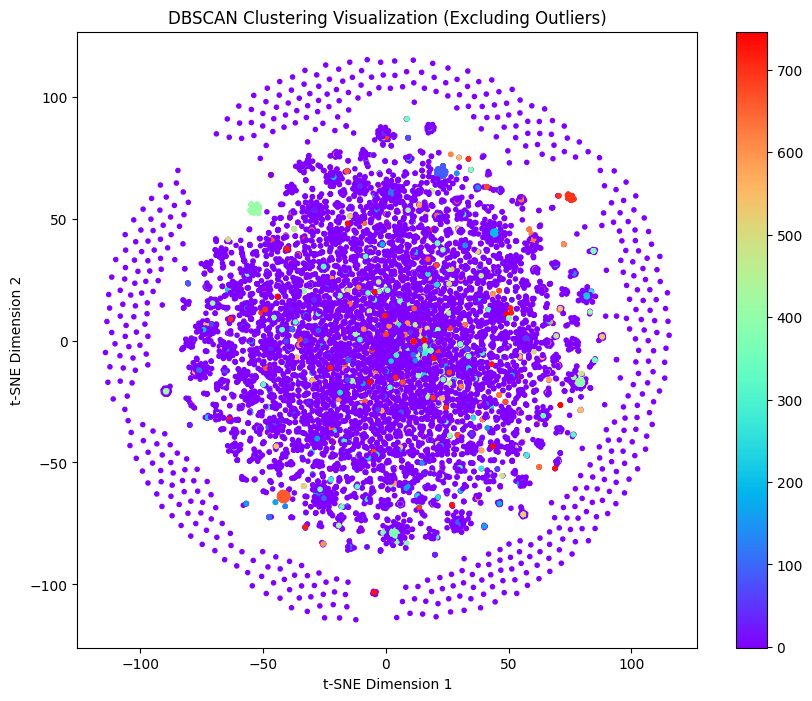

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have already computed tfidf_matrix_reduced
# eps and min_samples are defined as you provided

# dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# dbscan.fit(tfidf_matrix_reduced)

cluster_assignments = dbscan.labels_
num_clusters = len(set(cluster_assignments)) - (1 if -1 in cluster_assignments else 0)
print(f"Number of clusters: {num_clusters}")
print(cluster_assignments)

num_noise_points = np.sum(cluster_assignments == 0)
print(f"Number of noise/outlier points: {num_noise_points}")

# Get indices of points that are not outliers
non_outlier_indices = np.where(cluster_assignments != 0)

# Visualize clusters using t-SNE with "random" initialization
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="random")
tsne_result = tsne.fit_transform(tfidf_matrix[non_outlier_indices])

# Get cluster assignments for non-outlier points
cluster_assignments_non_outliers = cluster_assignments[non_outlier_indices]

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_assignments_non_outliers, cmap='rainbow', marker='.')
plt.title("DBSCAN Clustering Visualization (Excluding Outliers)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()
